# Calcul avancé : Travail sur les équations différentielles

Dans ce travail, vous allez utiliser une méthode d’approximation numérique pour construire la solution approchée d’une équation différentielle qui satisfait à une condition initiale donnée.

Vous allez ensuite comparer cette solution approchée à la véritable solution particulière de l’équation différentielle qui satisfait à cette condition initiale.

## Méthode de Runge-Kutta (ordre 4)

La méthode que vous allez utiliser est la **méthode de Runge-Kutta classique d’ordre 4**. Malgré le fait que cette méthode soit relativement facile à mettre en œuvre, elle fournit des résultats très acceptables et elle est couramment utilisée en analyse numérique.

Elle a été nommée ainsi en l’honneur des mathématiciens **Carl Runge** et **Martin Wilhelm Kutta**.

###  Description de la procédure

On construit une table des valeurs (approximatives) de la solution de l’équation différentielle :

$$ y' = f(x, y) $$

qui satisfait à la condition initiale $ y(x_0) = y_0 $, c’est-à-dire qui passe par un point $(x_0, y_0)$ donné du plan.

Pour ce faire, on calcule les valeurs de $ y $ qui correspondent à une suite de valeurs de $ x $ régulièrement espacées :

$$ x_0, x_1 = x_0 + \Delta x, x_2 = x_1 + \Delta x, \dots $$

Pour chaque valeur de $ k $, on calcule successivement les valeurs suivantes :

$$ a_k = f(x_k, y_k) \cdot \Delta x $$
$$ b_k = f(x_k + \frac{\Delta x}{2}, y_k + \frac{a_k}{2}) \cdot \Delta x $$
$$ c_k = f(x_k + \frac{\Delta x}{2}, y_k + \frac{b_k}{2}) \cdot \Delta x $$
$$ d_k = f(x_k + \Delta x, y_k + c_k) \cdot \Delta x $$

Finalement :

$$ y_{k+1} = y_k + \frac{1}{6} (a_k + 2b_k + 2c_k + d_k) $$

## Votre travail

1. **(a)** Utilisez la méthode de Runge-Kutta d’ordre 4 pour construire la table des valeurs (approximatives) de la solution de l’équation différentielle :

   $$ y' = \frac{2x \tan y}{y - x^2} $$

   qui satisfait à la condition initiale $ y(-\sqrt{\pi/6}) = -\pi/6 $. Les valeurs de $ x $ doivent varier de $ x = -1 $ jusqu’à $ x = 1 $, avec un pas $ \Delta x = 0.01 $.

2. **(b)** Utilisez la table de valeurs que vous avez construite en (a) pour tracer le graphe de cette solution dans l’intervalle $ [-1,1] $. 

   Construisez votre graphique de façon à bien montrer le comportement de la solution de votre équation différentielle dans cet intervalle. N’oubliez pas d’identifier les axes de votre graphique.

3. **(c)** Utilisez les techniques vues en classe pour trouver la solution particulière de l’équation différentielle qui satisfait à la condition initiale $ y(-\sqrt{\pi/6}) = -\pi/6 $.

   Montrez bien toutes les étapes de vos calculs.

4. **(d)** Tracez, sur un même graphique, le graphe de la solution approximative trouvée en (a) et le graphe de la solution trouvée en (c).

   Ici encore, construisez votre graphique de façon à bien montrer le comportement de la solution de votre équation différentielle dans l’intervalle $ [-1,1] $. Identifiez bien chacune des deux courbes, et n’oubliez pas d’identifier les axes de votre graphique.

### Importation des librairies

In [10]:
import numpy as np
import matplotlib.pyplot as plt

### **Votre équation différentielle (Pour la partie numérique)**

Doit être une équation différentielle $$y'$$ qui retourne $$f(x,y)$$

In [11]:
def f(x, y):
  return (2 * x * np.tan(y)) / (y - x**2)

### **Votre solution générale de l'équation différentielle (Calculée mathématiquement)**

Doit être une fonction $$g(x,y,C)$$ qui retourne $$g(x,y) + C$$

In [12]:
def g(x, y, C):
  return x**2 * np.sin(y) - y  * np.sin(y) - np.cos(y) + C

### **Initialisation des paramètres**

In [13]:
y0 = -np.pi / 6
x0 = -np.sqrt(np.pi / 6)
delta_x = 0.01

# Pour l'intervalle de x
x_start = -1
x_end = 1

# Pour l'intervalle de y
# Si vous ne savez pas quoi mettre, laissez les valeurs par défaut
#y_start = -100
#y_end = 100
y_start = -1.1
y_end = -0.3

# Afficher la grille du graphique ou pas
show_grid = True

### Classe principale (NE PAS MODIFIER)

Simplement éxécuter le code

In [14]:
class DifferentialEquation:

  def __init__(self, f, g, y0, x0, dx, x_start, x_end, y_start, y_end, show_grid = True):
    self.f = f
    self.g = g
    self.y0 = y0
    self.x0 = x0
    self.dx = dx
    self.x_start = x_start
    self.x_end = x_end
    self.y_start = y_start
    self.y_end = y_end
    self.show_grid = show_grid


  def runge_kutta(self):
    """
    Implémente la méthode de Runge-Kutta d'ordre 4 pour résoudre une équation différentielle ordinaire.
    """
    # Créer un tableau de valeurs x0 à x_end avec un pas de dx entre chaque valeur
    x_values = np.arange(self.x0, self.x_end + self.dx, self.dx)

    # Créer un tableau de zéros de la même taille que x_values pour stocker les valeurs y
    y_values = np.zeros_like(x_values)
    y_values[0] = self.y0  # Initialiser la première valeur de y avec y0

    # Boucle de calcul de la méthode de Runge-Kutta d'ordre 4
    for i in range(1, len(x_values)):
        x_k = x_values[i-1]  # Récupérer la valeur de x à l'itération précédente
        y_k = y_values[i-1]  # Récupérer la valeur de y à l'itération précédente

        # Calculer les coefficients de Runge-Kutta d'ordre 4
        a_k = self.f(x_k, y_k) * self.dx
        b_k = self.f(x_k + self.dx / 2, y_k + a_k / 2) * self.dx
        c_k = self.f(x_k + self.dx / 2, y_k + b_k / 2) * self.dx
        d_k = self.f(x_k + self.dx, y_k + c_k) * self.dx

        # Mettre à jour la valeur de y
        y_values[i] = y_k + (a_k + 2 * b_k + 2 * c_k + d_k) / 6

    return x_values, y_values


  def calculate_mathematical_solution(self):
    """
    Calcule la solution mathématique implicite de l'équation différentielle en résolvant g(x, y, C) = 0.
    """
    # Trouver la constante C (Solution particulière)
    C = -self.g(self.x0, self.y0, 0)

    # Génération de la grille de points pour tracer les courbes de niveau
    x_values = np.linspace(self.x_start, self.x_end, 100)
    y_values = np.linspace(self.y_start, self.y_end, 100)
    X, Y = np.meshgrid(x_values, y_values)
    Z = self.g(X, Y, C)

    return X, Y, Z


  def plot_numerical_solution(self, x_values, y_values):
    """
    Affiche le graphique de la solution numérique calculée par Runge-Kutta.

    Paramètres :

    x_values, y_values : valeurs des points calculés par Runge-Kutta
    """
    plt.figure(figsize = (5, 3))
    plt.plot(x_values, y_values, color = "b")
    plt.xlim(self.x_start, self.x_end)  # Limiter l'axe x entre x_start et x_end
    plt.ylim(self.y_start, self.y_end)  # Limiter l'axe y entre y_start et y_end
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Solution numérique de l'équation différentielle")
    plt.grid(self.show_grid)
    plt.show()


  def plot_mathematical_solution(self, X, Y, Z):
    """
    Affiche le graphique de la solution mathématique implicite de l'équation différentielle.

    Paramètres :

    X, Y : grilles de points générées pour l'équation implicite
    Z : valeurs de g(x, y, C) sur la grille
    """
    plt.figure(figsize = (5, 3))
    plt.contour(X, Y, Z, colors = "r")
    plt.xlim(self.x_start, self.x_end)  # Limiter l'axe x entre x_start et x_end
    plt.ylim(self.y_start, self.y_end)  # Limiter l'axe y entre y_start et y_end
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Solution mathématique de l'équation différentielle")
    plt.grid(self.show_grid)
    plt.show()


  def plot_comparison(self, x_values, y_values, X, Y, Z):
    """
    Affiche une comparaison entre la solution numérique et la solution mathématique implicite.

    Paramètres :

    x_values, y_values : valeurs des points calculés par Runge-Kutta
    X, Y : grilles de points générées pour l'équation implicite
    Z : valeurs de g(x, y, C) sur la grille
    """
    plt.figure(figsize = (5, 3))
    plt.plot(x_values, y_values, color = "b", label = "Solution numérique")
    plt.contour(X, Y, Z, colors = "r", linestyles = "--")  # levels = [0] pour tracer la courbe de niveau correspondant à g(x, y, C) = 0 (Z = 0)
    plt.xlim(self.x_start, self.x_end)  # Limiter l'axe x entre x_start et x_end
    plt.ylim(self.y_start, self.y_end)  # Limiter l'axe y entre y_start et y_end
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.title("Comparaison entre les deux solutions")
    plt.grid(self.show_grid)
    plt.show()


### **Résolution**

Initialisation de la classe

In [15]:
# Créer une instance de la classe DifferentialEquation avec les paramètres donnés auparavant
diff_eq = DifferentialEquation(f, g, y0, x0, delta_x, x_start, x_end, y_start, y_end, show_grid)

Affichage des résultats

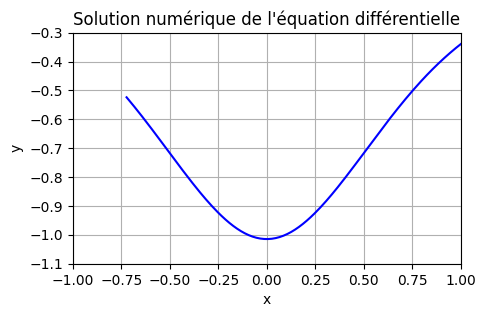

In [16]:
# Résoudre l'équation différentielle avec la méthode de Runge-Kutta
x_values, y_values = diff_eq.runge_kutta()

diff_eq.plot_numerical_solution(x_values, y_values)

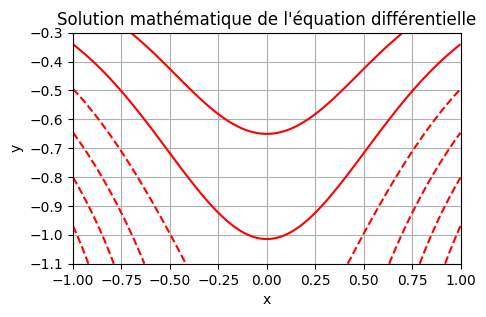

In [17]:
# Calculer la solution particulière de façon mathématique
X, Y, Z = diff_eq.calculate_mathematical_solution()

diff_eq.plot_mathematical_solution(X, Y, Z)

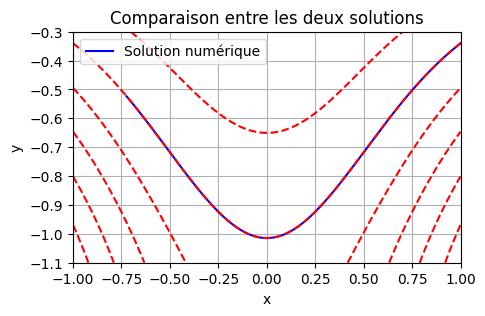

In [18]:
# Comparer les deux solutions

diff_eq.plot_comparison(x_values, y_values, X, Y, Z)

Normalement, si vous le faites avec une autre équation différentielle, les résultats devraient être semblables. Dans ce cas-ci, c'est ce que nous observons !